In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.simplefilter("ignore")


In [6]:
loan= pd.read_csv(r"C:\Naresh IT\Data Analysis Project file\Bank Loan\financial_loan.csv")
pd.set_option("display.max_columns",None)

In [7]:
loan

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,ho,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,16-06-2021,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,Current,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,Current,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,Current,16-06-2021,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


# 1. Data Exploration

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [9]:
loan["annual_income"].unique()

array([ 30000. ,  48000. ,  50000. , ...,  44250. ,  57040.5, 368000. ])

In [10]:
loan.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

### count

In [11]:
count= ['id','member_id','loan_amount', 'total_acc',
       'total_payment']

In [12]:
loan["id"].describe()

count    3.857600e+04
mean     6.810371e+05
std      2.113246e+05
min      5.473400e+04
25%      5.135170e+05
50%      6.627280e+05
75%      8.365060e+05
max      1.077501e+06
Name: id, dtype: float64

In [13]:
loan['member_id'].value_counts()

member_id
1314167    1
317830     1
605588     1
607168     1
539366     1
          ..
354316     1
222675     1
592798     1
1070101    1
872217     1
Name: count, Length: 38576, dtype: int64

In [14]:
loan["member_id"].describe()

count    3.857600e+04
mean     8.476515e+05
std      2.668105e+05
min      7.069900e+04
25%      6.629788e+05
50%      8.473565e+05
75%      1.045652e+06
max      1.314167e+06
Name: member_id, dtype: float64

In [15]:
loan["loan_amount"].describe()

count    38576.000000
mean     11296.066855
std       7460.746022
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [16]:
loan["loan_amount"].value_counts()

loan_amount
10000    2761
12000    2295
5000     1977
15000    1860
6000     1852
         ... 
15675       1
24175       1
5725        1
1625        1
24975       1
Name: count, Length: 880, dtype: int64

In [17]:
loan["total_acc"].describe()

count    38576.000000
mean        22.132544
std         11.392282
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [18]:
loan["total_payment"].describe()

count    38576.000000
mean     12263.348533
std       9051.104777
min         34.000000
25%       5633.000000
50%      10042.000000
75%      16658.000000
max      58564.000000
Name: total_payment, dtype: float64

### continous

In [19]:
continous= ['emp_length','annual_income',
       'dti', 'installment', 'int_rate']

In [20]:
loan["emp_length"].describe()

count         38576
unique           11
top       10+ years
freq           8870
Name: emp_length, dtype: object

In [21]:
loan["emp_length"].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [22]:
loan["emp_length"].value_counts()

emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64

In [23]:
loan['annual_income'].describe()

count    3.857600e+04
mean     6.964454e+04
std      6.429368e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320050e+04
max      6.000000e+06
Name: annual_income, dtype: float64

In [24]:
loan['annual_income'].unique()

array([ 30000. ,  48000. ,  50000. , ...,  44250. ,  57040.5, 368000. ])

In [25]:
loan['annual_income'].value_counts()

annual_income
60000.00     1471
50000.00     1033
40000.00      859
45000.00      810
75000.00      802
             ... 
47838.00        1
38000.04        1
35570.00        1
171600.00       1
368000.00       1
Name: count, Length: 5096, dtype: int64

In [26]:
loan['dti'].describe()

count    38576.000000
mean         0.133274
std          0.066662
min          0.000000
25%          0.082100
50%          0.134200
75%          0.185900
max          0.299900
Name: dti, dtype: float64

In [27]:
loan['dti'].unique()

array([0.01  , 0.0535, 0.2088, ..., 0.2721, 0.2543, 0.272 ])

In [28]:
loan['dti'].value_counts()

dti
0.0000    173
0.1200     48
0.1800     44
0.1920     40
0.1680     38
         ... 
0.2694      1
0.2960      1
0.2961      1
0.2670      1
0.2720      1
Name: count, Length: 2863, dtype: int64

In [29]:
loan['installment'].describe()

count    38576.000000
mean       326.862965
std        209.092000
min         15.690000
25%        168.450000
50%        283.045000
75%        434.442500
max       1305.190000
Name: installment, dtype: float64

In [30]:
loan['installment'].value_counts()

installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
459.53     1
215.15     1
167.29     1
218.66     1
627.93     1
Name: count, Length: 15132, dtype: int64

In [31]:
loan['int_rate'].describe()

count    38576.000000
mean         0.120488
std          0.037164
min          0.054200
25%          0.093200
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64

In [32]:
loan['int_rate'].unique()

array([0.1527, 0.1864, 0.1596, 0.1065, 0.0603, 0.1465, 0.1427, 0.079 ,
       0.089 , 0.1269, 0.1242, 0.1171, 0.0991, 0.1629, 0.0743, 0.1114,
       0.1109, 0.0766, 0.0751, 0.0963, 0.0894, 0.1148, 0.1149, 0.157 ,
       0.0788, 0.0705, 0.1189, 0.1074, 0.1284, 0.0749, 0.0849, 0.1136,
       0.1199, 0.1095, 0.1099, 0.1221, 0.1241, 0.1134, 0.1399, 0.1367,
       0.1677, 0.1   , 0.0807, 0.0863, 0.0976, 0.1393, 0.0712, 0.1046,
       0.092 , 0.1166, 0.1091, 0.1103, 0.074 , 0.0768, 0.0662, 0.0599,
       0.0699, 0.0729, 0.0542, 0.0676, 0.0774, 0.0692, 0.0932, 0.0617,
       0.0639, 0.0579, 0.08  , 0.0859, 0.0714, 0.0691, 0.0737, 0.0832,
       0.0925, 0.1075, 0.0999, 0.1036, 0.1025, 0.1111, 0.1126, 0.1218,
       0.1059, 0.0962, 0.1037, 0.1158, 0.0988, 0.1062, 0.1253, 0.1051,
       0.1287, 0.1273, 0.138 , 0.1472, 0.1347, 0.1523, 0.1426, 0.1268,
       0.1311, 0.1417, 0.1349, 0.1304, 0.1599, 0.1595, 0.1533, 0.0654,
       0.1183, 0.1357, 0.1306, 0.1422, 0.1316, 0.1496, 0.1565, 0.1474,
      

In [33]:
loan['int_rate'].value_counts()

int_rate
0.1099    932
0.1349    811
0.1149    796
0.0751    755
0.0788    701
         ... 
0.2264      1
0.1671      1
0.1620      1
0.1601      1
0.1754      1
Name: count, Length: 371, dtype: int64

### categorical

In [34]:
categorical= ['address_state', 'application_type', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date',
       'purpose', 'sub_grade', 'term', 'verification_status']

In [35]:
loan['address_state'].describe()

count     38576
unique       50
top          CA
freq       6894
Name: address_state, dtype: object

In [36]:
loan['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [37]:
loan['address_state'].value_counts()

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64

In [38]:
loan['application_type'].describe()

count          38576
unique             1
top       INDIVIDUAL
freq           38576
Name: application_type, dtype: object

In [39]:
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [40]:
loan['application_type'].value_counts()

application_type
INDIVIDUAL    38576
Name: count, dtype: int64

In [41]:
loan['emp_title'].describe()

count       37138
unique      28525
top       US Army
freq          135
Name: emp_title, dtype: object

In [42]:
loan['emp_title'].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [43]:
loan['emp_title'].value_counts()

emp_title
US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: count, Length: 28525, dtype: int64

In [44]:
loan['grade'].describe()

count     38576
unique        7
top           B
freq      11674
Name: grade, dtype: object

In [45]:
loan['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [46]:
loan['grade'].value_counts()

grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64

In [47]:
loan['home_ownership'].describe()

count     38576
unique        5
top        RENT
freq      18439
Name: home_ownership, dtype: object

In [48]:
loan['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [49]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [50]:
loan['issue_date'].describe()

count          38576
unique            65
top       11-12-2021
freq            2188
Name: issue_date, dtype: object

In [51]:
loan['issue_date'].unique()

array(['11-02-2021', '01-01-2021', '05-01-2021', '25-02-2021',
       '17-07-2021', '19-11-2021', '11-06-2021', '02-09-2021',
       '09-02-2021', '22-07-2021', '11-09-2021', '11-08-2021',
       '11-12-2021', '11-10-2021', '02-12-2021', '09-10-2021',
       '12-12-2021', '02-02-2021', '07-07-2021', '08-01-2021',
       '09-08-2021', '11-01-2021', '11-11-2021', '09-06-2021',
       '10-01-2021', '11-05-2021', '10-03-2021', '10-05-2021',
       '09-05-2021', '11-04-2021', '09-07-2021', '09-12-2021',
       '09-11-2021', '09-03-2021', '08-10-2021', '08-03-2021',
       '08-11-2021', '07-09-2021', '08-02-2021', '07-08-2021',
       '09-01-2021', '10-12-2021', '11-03-2021', '10-07-2021',
       '11-07-2021', '09-04-2021', '10-02-2021', '10-08-2021',
       '10-04-2021', '10-11-2021', '10-10-2021', '10-06-2021',
       '09-09-2021', '08-08-2021', '10-09-2021', '08-12-2021',
       '08-05-2021', '08-06-2021', '08-09-2021', '08-07-2021',
       '08-04-2021', '07-11-2021', '07-10-2021', '07-12

In [52]:
loan['issue_date'].value_counts()

issue_date
11-12-2021    2188
11-11-2021    2120
11-10-2021    2025
11-09-2021    1980
11-08-2021    1873
              ... 
02-09-2021       1
22-07-2021       1
12-12-2021       1
02-02-2021       1
07-06-2021       1
Name: count, Length: 65, dtype: int64

In [53]:
loan['last_credit_pull_date'].describe()

count          38576
unique           107
top       16-05-2021
freq           10041
Name: last_credit_pull_date, dtype: object

In [54]:
loan['last_credit_pull_date'].unique()

array(['13-09-2021', '14-12-2021', '12-12-2021', '16-03-2021',
       '14-06-2021', '14-07-2021', '15-06-2021', '13-03-2021',
       '13-10-2021', '14-02-2021', '16-04-2021', '15-09-2021',
       '16-05-2021', '09-12-2021', '13-02-2021', '13-11-2021',
       '10-11-2021', '14-04-2021', '12-01-2021', '12-03-2021',
       '11-06-2021', '13-12-2021', '12-06-2021', '14-03-2021',
       '11-04-2021', '11-11-2021', '15-02-2021', '11-07-2021',
       '10-12-2021', '11-01-2021', '07-08-2021', '10-05-2021',
       '12-09-2021', '10-09-2021', '10-02-2021', '11-03-2021',
       '16-02-2021', '12-05-2021', '11-02-2021', '14-10-2021',
       '14-01-2021', '11-09-2021', '14-11-2021', '14-09-2021',
       '15-12-2021', '12-11-2021', '15-11-2021', '14-08-2021',
       '15-07-2021', '11-12-2021', '15-10-2021', '13-08-2021',
       '10-03-2021', '11-08-2021', '16-01-2021', '13-07-2021',
       '13-04-2021', '14-05-2021', '13-05-2021', '15-05-2021',
       '12-08-2021', '15-01-2021', '11-05-2021', '15-04

In [55]:
loan['last_credit_pull_date'].value_counts()

last_credit_pull_date
16-05-2021    10041
16-04-2021     2477
16-03-2021     1096
13-02-2021      832
16-02-2021      714
              ...  
07-05-2021        1
08-07-2021        1
20-01-2022        1
08-06-2021        1
07-07-2021        1
Name: count, Length: 107, dtype: int64

In [56]:
loan['last_payment_date'].describe()

count          38576
unique           102
top       16-05-2021
freq            1209
Name: last_payment_date, dtype: object

In [57]:
loan['last_payment_date'].unique()

array(['13-04-2021', '15-01-2021', '09-01-2021', '12-03-2021',
       '12-08-2021', '13-12-2021', '14-07-2021', '12-10-2021',
       '16-03-2021', '13-08-2021', '13-09-2021', '14-12-2021',
       '13-10-2021', '12-11-2021', '15-02-2021', '10-08-2021',
       '10-02-2021', '11-06-2021', '08-08-2021', '13-06-2021',
       '09-12-2021', '12-02-2021', '12-07-2021', '10-07-2021',
       '13-01-2021', '11-08-2021', '11-10-2021', '11-01-2021',
       '13-07-2021', '09-10-2021', '13-11-2021', '10-11-2021',
       '11-03-2021', '11-07-2021', '12-06-2021', '11-12-2021',
       '09-09-2021', '13-05-2021', '14-03-2021', '08-04-2021',
       '10-10-2021', '10-05-2021', '11-02-2021', '10-09-2021',
       '10-04-2021', '10-06-2021', '12-05-2021', '14-10-2021',
       '14-06-2021', '14-05-2021', '14-01-2021', '14-04-2021',
       '11-09-2021', '14-08-2021', '14-11-2021', '12-01-2021',
       '14-02-2021', '12-12-2021', '12-04-2021', '13-02-2021',
       '14-09-2021', '10-03-2021', '11-11-2021', '11-04

In [58]:
loan['last_payment_date'].value_counts()

last_payment_date
16-05-2021    1209
13-03-2021    1001
14-12-2021     909
13-05-2021     884
13-02-2021     845
              ... 
08-11-2021      10
08-06-2021      10
08-03-2021       5
08-01-2021       4
08-02-2021       1
Name: count, Length: 102, dtype: int64

In [59]:
loan['loan_status'].describe()

count          38576
unique             3
top       Fully Paid
freq           32145
Name: loan_status, dtype: object

In [60]:
loan['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [61]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [62]:
loan['next_payment_date'].describe()

count          38576
unique           102
top       16-06-2021
freq            1209
Name: next_payment_date, dtype: object

In [63]:
loan['next_payment_date'].unique()

array(['13-05-2021', '15-02-2021', '09-02-2021', '12-04-2021',
       '12-09-2021', '13-01-2022', '14-08-2021', '12-11-2021',
       '16-04-2021', '13-09-2021', '13-10-2021', '14-01-2022',
       '13-11-2021', '12-12-2021', '15-03-2021', '10-09-2021',
       '10-03-2021', '11-07-2021', '08-09-2021', '13-07-2021',
       '09-01-2022', '12-03-2021', '12-08-2021', '10-08-2021',
       '13-02-2021', '11-09-2021', '11-11-2021', '11-02-2021',
       '13-08-2021', '09-11-2021', '13-12-2021', '10-12-2021',
       '11-04-2021', '11-08-2021', '12-07-2021', '11-01-2022',
       '09-10-2021', '13-06-2021', '14-04-2021', '08-05-2021',
       '10-11-2021', '10-06-2021', '11-03-2021', '10-10-2021',
       '10-05-2021', '10-07-2021', '12-06-2021', '14-11-2021',
       '14-07-2021', '14-06-2021', '14-02-2021', '14-05-2021',
       '11-10-2021', '14-09-2021', '14-12-2021', '12-02-2021',
       '14-03-2021', '12-01-2022', '12-05-2021', '13-03-2021',
       '14-10-2021', '10-04-2021', '11-12-2021', '11-05

In [64]:
loan['next_payment_date'].value_counts()

next_payment_date
16-06-2021    1209
13-04-2021    1001
14-01-2022     909
13-06-2021     884
13-03-2021     845
              ... 
08-12-2021      10
08-07-2021      10
08-04-2021       5
08-02-2021       4
08-03-2021       1
Name: count, Length: 102, dtype: int64

In [65]:
loan['purpose'].describe()

count                  38576
unique                    14
top       Debt consolidation
freq                   18214
Name: purpose, dtype: object

In [66]:
loan['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [67]:
loan['purpose'].value_counts()

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [68]:
loan['sub_grade'].describe()

count     38576
unique       35
top          B3
freq       2834
Name: sub_grade, dtype: object

In [69]:
loan['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [70]:
loan['sub_grade'].value_counts()

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [71]:
loan['term'].describe()

count          38576
unique             2
top        36 months
freq           28237
Name: term, dtype: object

In [72]:
loan['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [73]:
loan['term'].value_counts()

term
36 months    28237
60 months    10339
Name: count, dtype: int64

In [74]:
loan['verification_status'].describe()

count            38576
unique               3
top       Not Verified
freq             16464
Name: verification_status, dtype: object

In [75]:
loan['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [76]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

# 2. Data Cleaning

### missing values

In [77]:
loan.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [78]:
7744,31666,31667

(7744, 31666, 31667)

In [79]:
loan.iloc[[7744,31666,31667],6]=["MORTGAGE","MORTGAGE","MORTGAGE"]

In [80]:
loan.iloc[[7744,31666,31667],6]

7744     MORTGAGE
31666    MORTGAGE
31667    MORTGAGE
Name: home_ownership, dtype: object

In [81]:
loan["emp_title"].fillna("US Army",inplace=True)

In [82]:
loan.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

### duplicates

In [83]:
loan[loan.duplicated()].sum()

id                         0
address_state              0
application_type           0
emp_length                 0
emp_title                  0
grade                      0
home_ownership             0
issue_date                 0
last_credit_pull_date      0
last_payment_date          0
loan_status                0
next_payment_date          0
member_id                  0
purpose                    0
sub_grade                  0
term                       0
verification_status        0
annual_income            0.0
dti                      0.0
installment              0.0
int_rate                 0.0
loan_amount                0
total_acc                  0
total_payment              0
dtype: object

In [84]:
loan["issue_date"] = pd.to_datetime(loan["issue_date"],format="%d-%m-%Y")

In [85]:
loan["issue_month"]=loan["issue_date"].dt.month

In [86]:
loan["last_payment_date"] = pd.to_datetime(loan["last_payment_date"],format="%d-%m-%Y")

In [87]:
loan["lp_month"]=loan["last_payment_date"].dt.month

In [88]:
loan["next_payment_date"] = pd.to_datetime(loan["next_payment_date"],format="%d-%m-%Y")

In [89]:
loan["Np_month"]=loan["next_payment_date"].dt.month

In [90]:
loan.replace({"< 1 year":"1 years","1 year":"1 years","10+ years":"10 years"},inplace=True)

In [91]:
loan["emp_length"].unique()

array(['1 years', '9 years', '4 years', '10 years', '3 years', '5 years',
       '6 years', '2 years', '7 years', '8 years'], dtype=object)

In [92]:
loan.replace({"1 years":"1","2 years":"2","3 years":"3","4 years":"4","5 years":"5","6 years":"6","7 years":"7","8 years":"8","9 years":"9","10 years":"10"},inplace=True)

# 3. Analysis

In [93]:
loan.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_month,lp_month,Np_month
0,1077430,GA,INDIVIDUAL,1,Ryder,C,RENT,2021-02-11,13-09-2021,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,2,4,5
1,1072053,CA,INDIVIDUAL,9,MKC Accounting,E,RENT,2021-01-01,14-12-2021,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,1,1,2
2,1069243,CA,INDIVIDUAL,4,Chemat Technology Inc,C,RENT,2021-01-05,12-12-2021,2021-01-09,Charged Off,2021-02-09,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,1,1,2
3,1041756,TX,INDIVIDUAL,1,barnes distribution,B,MORTGAGE,2021-02-25,12-12-2021,2021-03-12,Fully Paid,2021-04-12,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,2,3,4
4,1068350,IL,INDIVIDUAL,10,ho,A,MORTGAGE,2021-01-01,14-12-2021,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,1,1,2


### 1. What is the total number of applications registered by specific period and by MTD and monitor the MOM ?


In [94]:
total_loan= loan.groupby(loan["application_type"])["issue_month"].value_counts()

In [95]:
total_loan

application_type  issue_month
INDIVIDUAL        12             4314
                  11             4035
                  10             3796
                  9              3536
                  8              3441
                  7              3366
                  6              3184
                  5              2911
                  4              2755
                  3              2627
                  1              2332
                  2              2279
Name: count, dtype: int64

In [96]:
loan["application_type"].describe()

count          38576
unique             1
top       INDIVIDUAL
freq           38576
Name: application_type, dtype: object

In [97]:
loan.groupby(loan["address_state"])["application_type"].value_counts()

address_state  application_type
AK             INDIVIDUAL            78
AL             INDIVIDUAL           432
AR             INDIVIDUAL           236
AZ             INDIVIDUAL           833
CA             INDIVIDUAL          6894
CO             INDIVIDUAL           770
CT             INDIVIDUAL           730
DC             INDIVIDUAL           214
DE             INDIVIDUAL           110
FL             INDIVIDUAL          2773
GA             INDIVIDUAL          1355
HI             INDIVIDUAL           170
IA             INDIVIDUAL             5
ID             INDIVIDUAL             6
IL             INDIVIDUAL          1486
IN             INDIVIDUAL             9
KS             INDIVIDUAL           260
KY             INDIVIDUAL           320
LA             INDIVIDUAL           426
MA             INDIVIDUAL          1310
MD             INDIVIDUAL          1027
ME             INDIVIDUAL             3
MI             INDIVIDUAL           685
MN             INDIVIDUAL           592
MO      

#### Plot

<Axes: xlabel='issue_month', ylabel='Count'>

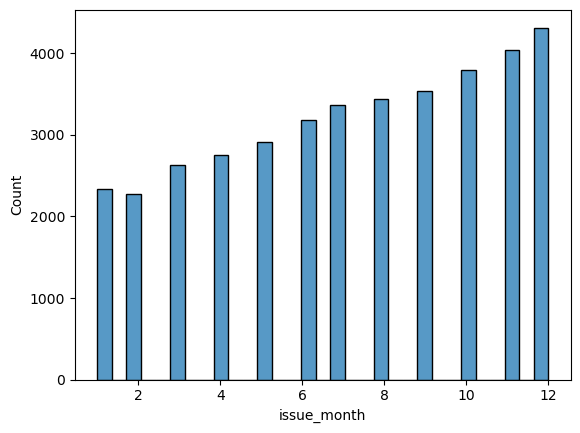

In [98]:
sns.histplot(loan["issue_month"])

#### -->Obervation

 - Here i can see that the total number of application register in year 2021 is 38576 .
 - In december maximum number of applications are registered with 4314 and in february minimum number of applications are registered with 2279.
 - With this plot i have conclude that after february ,month by month no of applications are increased.

### 2. how many applications registered and average applications registered by state and monitor he MOM?

In [99]:
state_loan = loan.groupby(loan["application_type"])["address_state"].value_counts()

In [100]:
state_loan

application_type  address_state
INDIVIDUAL        CA               6894
                  NY               3701
                  FL               2773
                  TX               2664
                  NJ               1822
                  IL               1486
                  PA               1482
                  VA               1375
                  GA               1355
                  MA               1310
                  OH               1188
                  MD               1027
                  AZ                833
                  WA                805
                  CO                770
                  NC                759
                  CT                730
                  MI                685
                  MO                660
                  MN                592
                  NV                482
                  SC                464
                  WI                446
                  OR                436
        

#### Plot

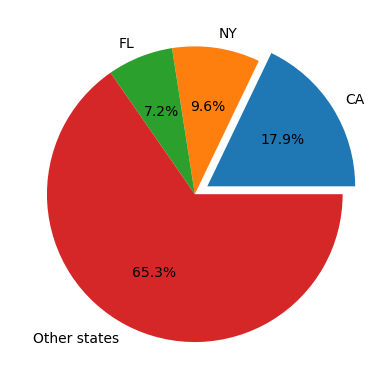

In [101]:
state=["CA","NY","FL","Other states"]
plt.pie([6894,3701,2773,25208],labels=state,autopct="%1.1f%%",explode=[0.1,0,0,0])
plt.show()

#### -->Observation

 - Here i can observe that most no of applications are registered from state CA with 6894 and less no of application are registered from ME with 3.

### 3. State wise borrower's home ownership.

In [102]:
pd.crosstab(loan["home_ownership"],loan["address_state"])

address_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
home_ownership,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,45,278,157,467,2186,388,331,55,64,1306,827,47,2,3,724,4,148,204,229,492,496,0,434,322,409,8,41,441,3,83,630,99,256,848,664,192,177,700,98,281,40,7,1445,156,651,24,356,235,100,48
OTHER,0,0,1,5,21,5,1,4,0,4,6,0,0,0,3,0,2,0,1,4,2,0,2,1,1,1,1,1,0,0,3,0,1,7,2,0,1,1,1,1,0,0,6,0,6,2,0,1,0,0
OWN,6,60,22,44,367,31,60,12,9,240,93,13,1,1,93,0,29,30,48,99,71,0,65,41,48,2,8,49,0,15,165,21,15,325,92,25,15,142,9,47,5,2,239,6,90,2,30,20,23,8
RENT,27,94,56,317,4320,346,338,143,37,1223,429,110,2,2,666,5,81,86,148,715,458,3,184,228,202,8,29,268,2,63,1024,63,210,2521,430,76,243,639,88,135,18,8,974,90,628,26,419,190,44,23


In [103]:
loan["home_ownership"].value_counts()

home_ownership
RENT        18439
MORTGAGE    17201
OWN          2838
OTHER          98
Name: count, dtype: int64

#### Plot

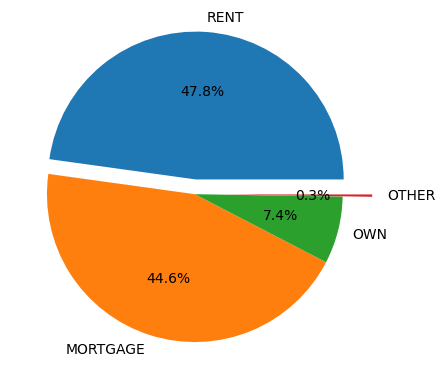

In [104]:
home_ownership=["RENT","MORTGAGE","OWN","OTHER"]
plt.pie([18442,17198,2838,98],labels=home_ownership,autopct="%1.1f%%",explode=[0.1,0,0,0.2])
plt.show()

#### -->Observation

 - Here i observe that rented people are more.
 - From MORTGAGE,RENT,OWN and OTHER most registraton are From state CA.

### 4. Check Borrower length along with home ownership.

In [105]:
loan["emp_length"].describe()

count     38576
unique       10
top          10
freq       8870
Name: emp_length, dtype: object

In [106]:
pd.crosstab(loan["home_ownership"],loan["emp_length"],margins=True)

emp_length,1,10,2,3,4,5,6,7,8,9,All
home_ownership,,,,,,,,,,,
MORTGAGE,2273,5549,1468,1570,1401,1483,1092,884,780,701,17201
OTHER,36,19,10,10,7,5,4,3,4,0,98
OWN,561,756,282,253,241,233,161,140,119,92,2838
RENT,4934,2546,2622,2255,1779,1552,971,745,573,462,18439
All,7804,8870,4382,4088,3428,3273,2228,1772,1476,1255,38576


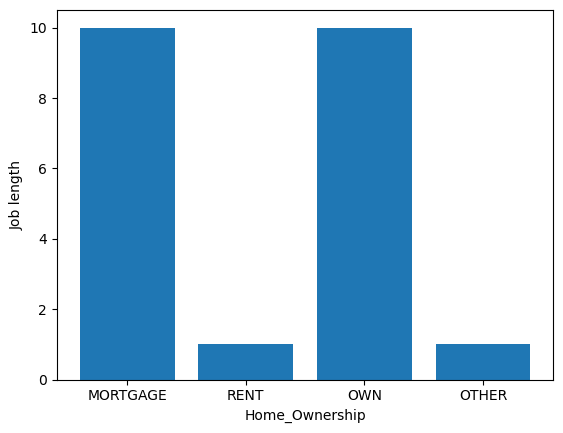

In [107]:
plt.bar(x=["MORTGAGE","RENT","OWN","OTHER"],height=[10,1,10,1])
plt.xlabel("Home_Ownership")
plt.ylabel("Job length")
plt.show()

In [108]:
loan["emp_length"].unique()

array(['1', '9', '4', '10', '3', '5', '6', '2', '7', '8'], dtype=object)

#### -->Observation

 - Here i can see that most no of borrowers are of 10 years exprience in their job field and less no of borrowers are from 1 years exprience.
 - Most 10 years exprience borrowers are living in Mortgage. and most no of 1 years of exprience of borrowers are living in rent.
 - Who has Own home have 10 years expreince. Who has rent house have 1 years of expreince.

### 5. Check Borrower length along with loan status.

In [109]:
pd.crosstab(loan["loan_status"],loan["emp_length"])

emp_length,1,10,2,3,4,5,6,7,8,9
loan_status,,,,,,,,,,
Charged Off,1076,1322,561,548,454,449,306,262,200,155
Current,146,391,97,83,94,88,61,62,44,32
Fully Paid,6582,7157,3724,3457,2880,2736,1861,1448,1232,1068


In [110]:
loan["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

#### Plot

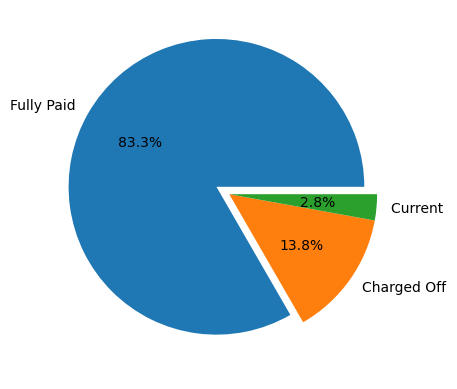

In [111]:
loan_status=["Fully Paid","Charged Off","Current "]
plt.pie([32145,5333,1098],labels=loan_status,autopct="%1.1f%%",explode=[0.1,0,0])
plt.show()

#### -->Observation

 - Here i observe that fullypaid borrowers are more and 10 years expreinced borrowers are fully paid. That means more expreinced borrowers are paid the    full amount.

### 6. Analysis on Good loan and Bad loan.

In [112]:
loan.replace({"Fully Paid":"Good loan","Current":"Good loan","Charged Off":"Bad loan"},inplace=True)

In [113]:
loan["loan_status"].value_counts()

loan_status
Good loan    33243
Bad loan      5333
Name: count, dtype: int64

#### Plot

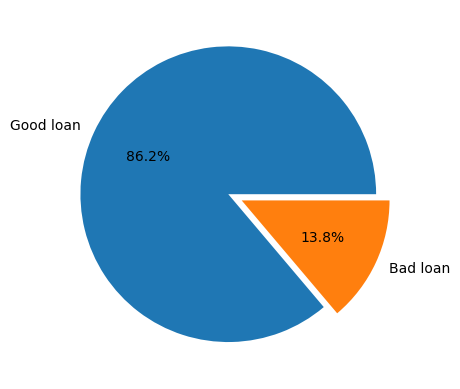

In [114]:
loan_status=["Good loan","Bad loan"]
plt.pie([33243,5333],labels=loan_status,autopct="%1.1f%%",explode=[0,0.1])
plt.show()

In [115]:
loan.groupby(["loan_status"])["loan_amount"].sum()

loan_status
Bad loan      65532225
Good loan    370224850
Name: loan_amount, dtype: int64

In [116]:
loan.groupby(["loan_status"])["total_payment"].sum()

loan_status
Bad loan      37284763
Good loan    435786170
Name: total_payment, dtype: int64

#### -->Observation

 - Here the good loan percentage is high with 86.2% and bad loan percentage is low with 13.8%.
 - Total good laon applications and bad loan applications are registered is 33243 and 5333 respectively.
 - Total funded amount for good loan is 65532225 and for bad loan is 370224850.
 - total recieved amount for good loan is 37284763 and for bad loan is 435786170.

### 7. Analysis on Purpose of loan.

In [117]:
loan["purpose"].value_counts()


purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

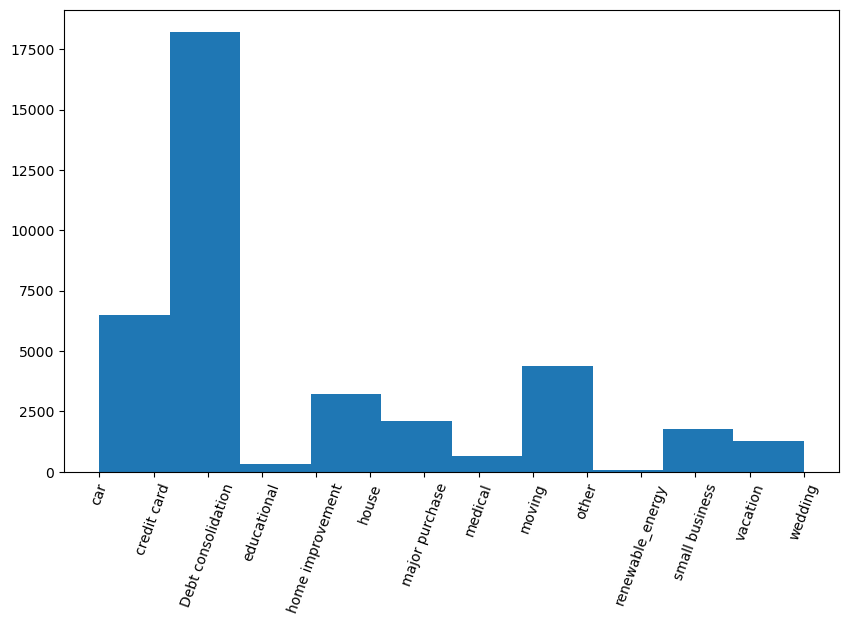

In [118]:
plt.figure(figsize=(10,6))
plt.hist(loan["purpose"])
plt.xticks(rotation=70)
plt.show()


#### -->Observation

 - Here debt concolidation loans are highest with 18214 and renewable energy loans are less with 94.

### 8. Analysis on Loan term. 

In [119]:
loan["term"].value_counts()

term
36 months    28237
60 months    10339
Name: count, dtype: int64

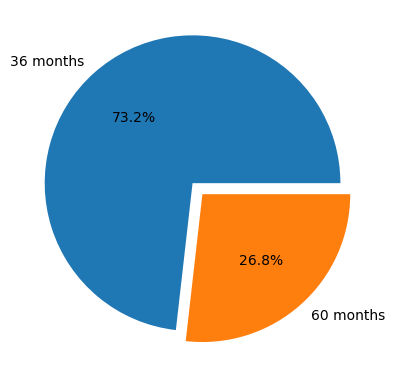

In [120]:
term=["36 months","60 months"]
plt.pie([28237,10339],labels=term,autopct="%1.1f%%",explode=[0.1,0])
# plt.figure(figsize=(24,54))
plt.show()

#### -->Observation

 - Here loans with term of 36 month are most with 28237 and loans with 60 months are less with 10339.

### 9. Analysis on annual income of borrowers.

In [121]:
loan["annual_income"].max()

6000000.0

In [122]:
loan["annual_income"].min()

4000.0

In [123]:
loan["annual_income"].mean()

69644.54031003732

#### -->Observation

 - The maximum , minimum and average annual income of borrowers are 6000000, 4000, 69644.

### 10. Analysis on DTI.

In [124]:
loan["dti"].describe()

count    38576.000000
mean         0.133274
std          0.066662
min          0.000000
25%          0.082100
50%          0.134200
75%          0.185900
max          0.299900
Name: dti, dtype: float64

In [125]:
loan.groupby(loan["grade"])["dti"].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,9689.0,0.120383,0.069732,0.0,0.064900,0.11500,0.1706,0.2999
B,11674.0,0.134321,0.066448,0.0,0.083425,0.13530,0.1864,0.2995
C,7904.0,0.139151,0.064673,0.0,0.091100,0.14090,0.1904,0.2956
D,5182.0,0.139808,0.063601,0.0,0.092625,0.14295,0.1915,0.2963
E,2786.0,0.140953,0.063752,0.0,0.093800,0.14495,0.1943,0.2819
F,1028.0,0.141738,0.061177,0.0,0.096500,0.14695,0.1893,0.2942
G,313.0,0.140594,0.062575,0.0,0.085200,0.14830,0.1951,0.2469


In [126]:
loan.groupby(loan["issue_month"])["dti"].describe()

,count,mean,std,min,25%,50%,75%,max
issue_month,,,,,,,,
1,2332.0,0.129370,0.066480,0.0,0.076800,0.13375,0.181425,0.2963
2,2279.0,0.134093,0.066437,0.0,0.082800,0.13430,0.186200,0.2935
3,2627.0,0.132156,0.067384,0.0,0.078750,0.13230,0.185800,0.2982
4,2755.0,0.132194,0.067920,0.0,0.080800,0.13320,0.185250,0.2993
5,2911.0,0.133337,0.066132,0.0,0.082400,0.13440,0.185950,0.2995
6,3184.0,0.132438,0.067634,0.0,0.080400,0.13315,0.185600,0.2986
7,3366.0,0.132948,0.067020,0.0,0.082150,0.13215,0.185000,0.2999
8,3441.0,0.133532,0.067169,0.0,0.082200,0.13350,0.187200,0.2993
9,3536.0,0.132978,0.066203,0.0,0.081575,0.13295,0.185625,0.2979


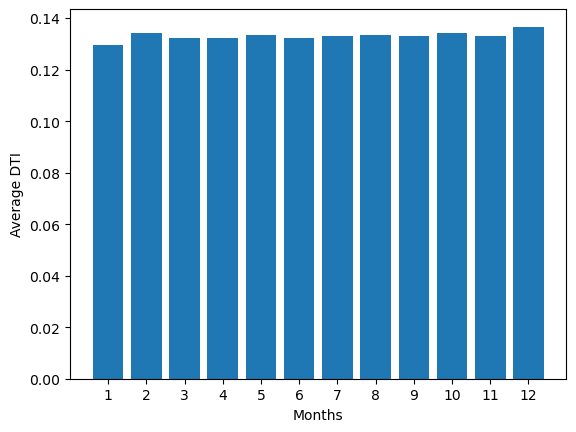

In [127]:
plt.bar(x=["1","2","3","4","5","6","7","8","9","10","11","12"],height=[0.129370,0.134093,0.132156,0.132194,0.133337,0.132438,0.132948,0.133532,0.132978,0.134144,0.133027,0.136655])
plt.xlabel("Months")
plt.ylabel("Average DTI")
plt.show()

In [128]:
loan.groupby(loan["term"])["dti"].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36 months,28237.0,0.129877,0.066666,0.0,0.0782,0.1301,0.18230,0.2999
60 months,10339.0,0.142552,0.065765,0.0,0.0941,0.1443,0.19455,0.2995


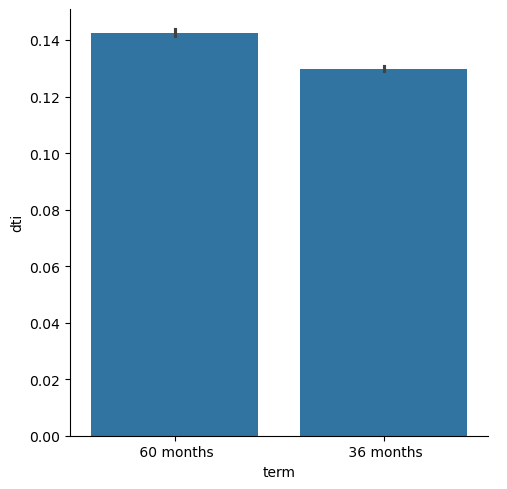

In [129]:
sns.catplot(x="term",y="dti",data=loan,kind="bar")

In [130]:
loan.groupby(loan["emp_length"])["dti"].describe()

,count,mean,std,min,25%,50%,75%,max
emp_length,,,,,,,,
1,7804.0,0.127682,0.066954,0.0,0.074600,0.12735,0.180500,0.2993
10,8870.0,0.137189,0.067114,0.0,0.086700,0.13865,0.189300,0.2999
2,4382.0,0.131047,0.066107,0.0,0.079300,0.13280,0.183000,0.2995
3,4088.0,0.131643,0.066198,0.0,0.080175,0.13220,0.183425,0.2993
4,3428.0,0.131997,0.066997,0.0,0.080275,0.13175,0.184525,0.2982
5,3273.0,0.134271,0.066994,0.0,0.081800,0.13510,0.188500,0.2988
6,2228.0,0.138239,0.065961,0.0,0.087875,0.13905,0.190900,0.2992
7,1772.0,0.136785,0.065417,0.0,0.086950,0.13810,0.188050,0.2989
8,1476.0,0.137697,0.065289,0.0,0.088775,0.13810,0.192200,0.2944


#### -->Observation

 - Here the maximum dti is 0.299900 and average dti is 0.133274.
 - "B" grade loans are most with 11674. in 'B' grade loans maximun dti is 0.2995 and average dti is 0.134321.
 - In 36 month loans maximum dti is 0.2999 and average dti is 0.129877.
 - In 60 month loans maximum dti is 0.2995 and average dti is 0.142552.
 - 10 years exprienced borrowers hvae a average dti of 0.137189 and maximum dti of 0.2999.
 - 1 years exprienced borrowers have a average dti of 0.125547 and maximum dti of 0.2993.
 - IN december average DTI is high with	0.136655 and in january average Dti is low with 0.129370 .

### 11. Analysis on Intrest rate.

In [131]:
loan["int_rate"].describe()

count    38576.000000
mean         0.120488
std          0.037164
min          0.054200
25%          0.093200
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64

In [132]:
loan.groupby(loan["issue_month"])["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
issue_month,,,,,,,,
1,2332.0,0.114619,0.033521,0.0542,0.08940,0.1141,0.1385,0.2086
2,2279.0,0.117216,0.034649,0.0542,0.09630,0.1111,0.1417,0.2159
3,2627.0,0.118583,0.034382,0.0542,0.09695,0.1136,0.1422,0.2159
4,2755.0,0.117409,0.032860,0.0542,0.09880,0.1111,0.1417,0.2159
5,2911.0,0.122578,0.036565,0.0542,0.09880,0.1199,0.1479,0.2359
6,3184.0,0.122742,0.038125,0.0542,0.09630,0.1189,0.1484,0.2459
7,3366.0,0.122372,0.036954,0.0542,0.09990,0.1186,0.1479,0.2322
8,3441.0,0.123002,0.037721,0.0542,0.09990,0.1189,0.1521,0.2359
9,3536.0,0.120032,0.037281,0.0542,0.08900,0.1183,0.1465,0.2391


In [133]:
loan.groupby(loan["term"])["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36 months,28237.0,0.110309,0.032229,0.0542,0.0790,0.1099,0.1347,0.2322
60 months,10339.0,0.148289,0.035506,0.0579,0.1199,0.1483,0.1749,0.2459


#### -->Observation

 - The maximum intrest rate is 0.245900 and average instrest rate is 0.120488 and the minimum intrest rate is 0.054200.
 - The hihgest average intrest rate is in december with 0.123560.
 - The highest average intrest rate is in 60 months term laons with 0.148289.

### 12. Analysis on total funded and total recieved amount.

In [134]:
loan["loan_amount"].sum()

435757075

In [135]:
loan["total_payment"].sum()

473070933

#### -->Observation

 - The total loan amount funded is 435757074.
 - The total amount recieved from borrowers is 473070933.